We detected that a big cluster of customers likes a specific combination of tastes

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [3]:
# 
df = pd.read_csv('data/best_taste_country.csv')

# 
df = pd.DataFrame(df, columns=['taste', 'keyword_count','wine','ratingAVG','ratingCOUNT'])


if df.empty:
    print("The DataFrame is empty. Please check the CSV file.")
else:
    filtered_df = df[df['ratingCOUNT'] > 4.5]
    top_tastes = filtered_df.nlargest(10, 'ratingCOUNT')
    fig = px.bar(top_tastes, x='ratingCOUNT', y='taste', orientation='h', 
                 color='taste', title='Top 10 taste wine (count of ratings and rating > 4.5)',
                 color_discrete_sequence=px.colors.qualitative.Set2)  # Choose a color sequence
    
    fig.update_layout(title_x=0.5)  # Center the title

    fig.show()

We would like to create a country leaderboard. Come up with a visual that shows the **average wine rating for each `country`**. (leaderborder_diagram.py)

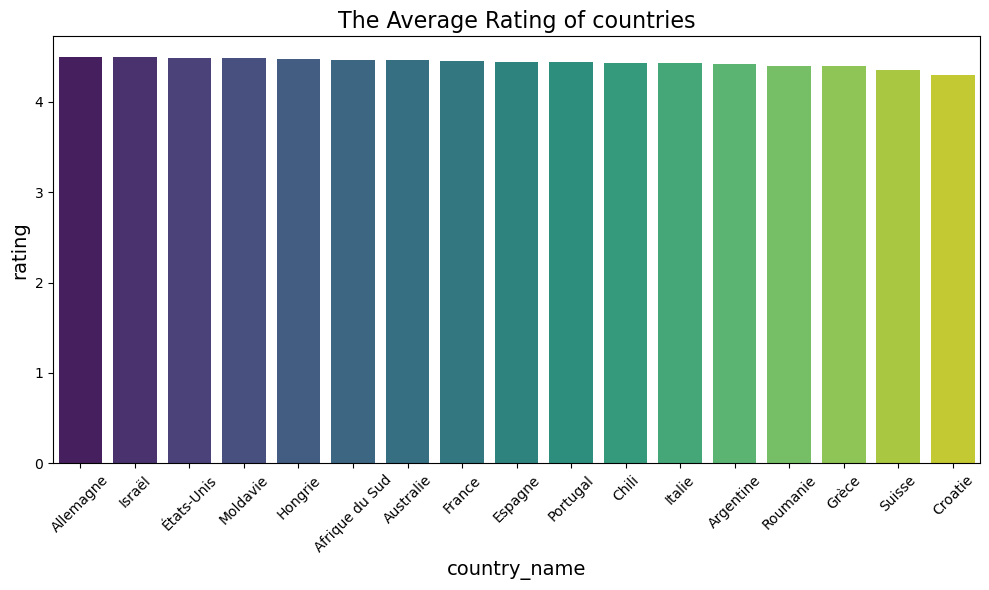

In [4]:

# We would like to create a country leaderboard. 
# Come up with a visual that shows the **average wine rating for each `country`**.

# Read the CSV file into a DataFrame
df = pd.read_csv('data/leaders.csv')

df = pd.DataFrame(df, columns=['country_name', 'rating'])

plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='country_name', y='rating', data=df, palette='viridis')

plt.title('The Average Rating of countries', fontsize=16)

plt.ylabel('rating', fontsize=14)
plt.xlabel('country_name', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

One of our VIP clients likes _Cabernet Sauvignon_ and would like our top 5 recommendations. Which wines would you recommend to him? (caberne_advise_csv.py)

Getting csv file

In [5]:

# One of our VIP clients likes _Cabernet Sauvignon_ and would like our top 5 recommendations. 
# Which wines would you recommend to him?

connection = sqlite3.connect('data/vivino.db')

cursor = connection.cursor()


sql_query = """
SELECT w.name,
       w.ratings_average,
       v.year,
       v.price_euros,
       r.name AS region_name,
       c.name AS country_name
FROM wines AS w
JOIN regions AS r ON w.region_id = r.id
JOIN countries AS c ON c.code = r.country_code
JOIN vintages AS v ON v.wine_id = w.id
WHERE w.name = 'Cabernet Sauvignon'  
ORDER BY w.ratings_average DESC
LIMIT 5;
"""

cursor.execute(sql_query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]

df = pd.DataFrame(results, columns=column_names)

df.to_csv('data/cabernet_sauvignon_results.csv', index=False)

cursor.close()
connection.close()

Answering on the question 

In [6]:
# One of our VIP clients likes _Cabernet Sauvignon_ and would like our top 5 recommendations. 
# Which wines would you recommend to him?


df = pd.read_csv('data/cabernet_sauvignon_results.csv')

advise = pd.DataFrame(df, columns=['Wine', 'Average Rating', 'Year', 'Price (€)', 'Region', 'Country'])

print("The best wine Cabernet Sauvignon")
print(df)

The best wine Cabernet Sauvignon
                 name  ratings_average  year  price_euros         region_name  \
0  Cabernet Sauvignon              4.8  2015      1558.75          Rutherford   
1  Cabernet Sauvignon              4.6  2018       275.00     Columbia Valley   
2  Cabernet Sauvignon              4.6  2019       177.95         Napa Valley   
3  Cabernet Sauvignon              4.6  2016       209.05          California   
4  Cabernet Sauvignon              4.5  2006       201.25  Walla Walla Valley   

  country_name  
0   États-Unis  
1   États-Unis  
2   États-Unis  
3   États-Unis  
4   États-Unis  


Count of global awards for wine by country

Getting the csv file

In [7]:
# count of global awards for wine by country

connection = sqlite3.connect('data/vivino.db')

cursor = connection.cursor()

sql_query = """
SELECT c.name AS country, COUNT(*) AS count
FROM vintage_toplists_rankings AS vi
JOIN toplists AS t ON vi.top_list_id = t.id
JOIN vintages AS v ON v.id = vi.vintage_id
JOIN wines AS w ON v.wine_id = w.id
JOIN regions AS r ON r.id = w.region_id
JOIN countries AS c ON c.code = r.country_code
WHERE t.country_code = 'global'
GROUP BY c.name;
"""

cursor.execute(sql_query)

results = cursor.fetchall()

# Get the column names from the cursor
column_names = [description[0] for description in cursor.description]

df = pd.DataFrame(results, columns=column_names)

df.to_csv('data/global_awards_wine.csv', index=False)

cursor.close()
connection.close()

Plotting the diagram

In [8]:
# Load the data
df = pd.read_csv('data/global_awards_wine.csv')

if 'country' in df.columns and 'count' in df.columns:

    total_count = df['count'].sum()

    df['count'] = (df['count'] * 100) / total_count
    
    fig = px.pie(df, values='count', names='country', title='Count of global awards for wine by Country')
    fig.update_layout(title={'text': 'Count of Global Awards for Wine by Country', 'x': 0.5, 'xanchor': 'center'})
    
    fig.show()
else:
    print("The required columns 'country' and 'count' are not present in the CSV file.")